In [ ]:
pip install -U pandas-profiling

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly.express as px
from math import pi
from plotly import __version__
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from IPython.core.display import HTML
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


from pandas import DataFrame



In [46]:
from google.colab import files


uploaded = files.upload()


Saving news_articles.csv to news_articles (2).csv


In [47]:
df=pd.read_csv("news_articles.csv")

In [48]:
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [50]:
df.shape

(2096, 12)

In [51]:
df.columns

Index(['author', 'published', 'title', 'text', 'language', 'site_url',
       'main_img_url', 'type', 'label', 'title_without_stopwords',
       'text_without_stopwords', 'hasImage'],
      dtype='object')

In [52]:
df.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [53]:
df=df.dropna()
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [54]:
df.groupby('label').describe()

hasImage                                             
         count      mean       std  min  25%  50%  75%  max
label                                                      
Fake    1291.0  0.736638  0.440628  0.0  0.0  1.0  1.0  1.0
Real     754.0  0.834218  0.372132  0.0  1.0  1.0  1.0  1.0

In [55]:
import pandas_profiling
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



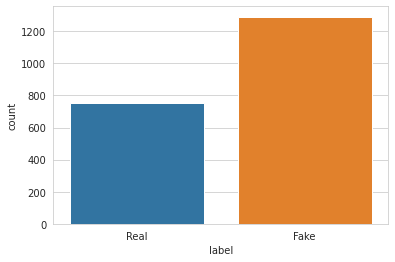

In [56]:
import seaborn as sns
sns.set_style("whitegrid")
sns.countplot(df['label'])

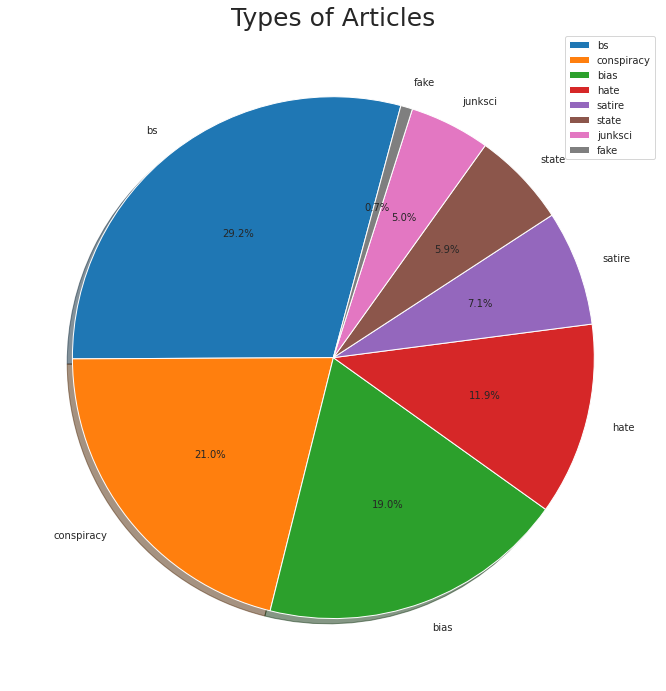

In [57]:
df['type'].value_counts().plot.pie(figsize = (15,12), startangle = 75,autopct = "%.1f%%",shadow=True)
plt.title('Types of Articles', fontsize = 25)
plt.axis('off')
plt.legend()
plt.show()

<Figure size 1080x720 with 0 Axes>

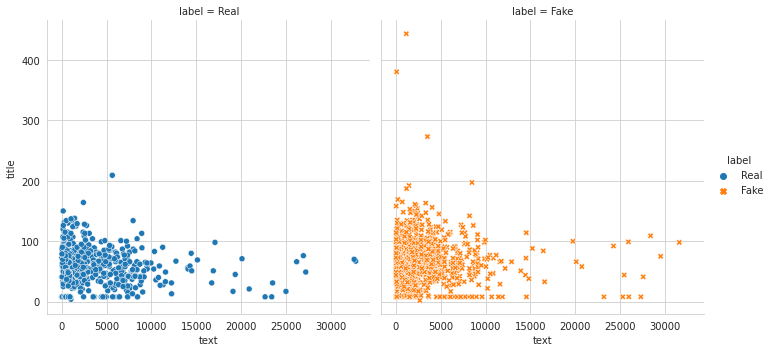

In [58]:
title_len=df['title'].apply(len)
text_len=df['text'].apply(len)

plt.figure(figsize = (15,10))
#sns.scatterplot(data=df, x=text_len, y=title_len,hue='label',style="label",col='label')
sns.relplot(
    data=df, x=text_len, y=title_len,
    col="label", hue="label", style="label",
    kind="scatter"
)
plt.show()

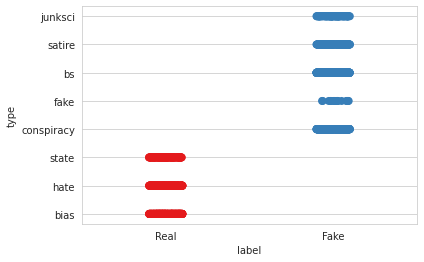

In [59]:
sns.stripplot(x="label", y="type", data=df,size=8,palette="Set1")

<Figure size 576x720 with 0 Axes>

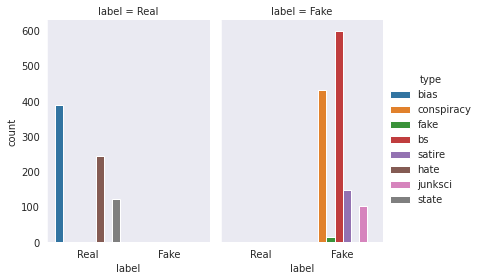

In [60]:
plt.figure(figsize = (8,10))
sns.set_style("dark")


sns.catplot(x="label", hue="type", col="label",
                data=df, kind="count",
                height=4, aspect=.7);

In [61]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['text_without_stopwords'], 20)
common_words_df = DataFrame (common_words,columns=['word','freq'])
fig = px.bar(common_words_df, x='word', y='freq',color='freq',
             labels={'Top 20 word & their frequency'}, height=400)
fig.show()

(-0.5, 2999.5, 1999.5, -0.5)

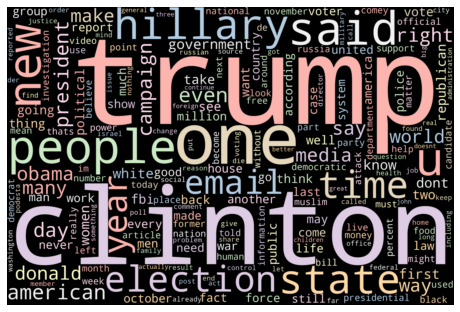

In [62]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(' '.join(df['text_without_stopwords']))

plt.figure(figsize=[8,10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

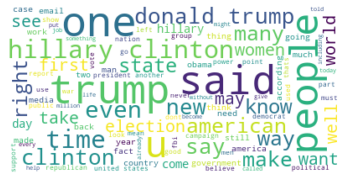

In [63]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(df['text_without_stopwords']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

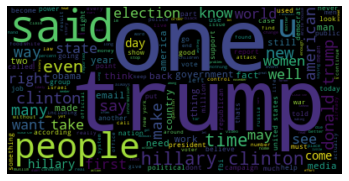

<Figure size 432x288 with 0 Axes>

In [64]:
text = (' '.join(df['text_without_stopwords']))
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



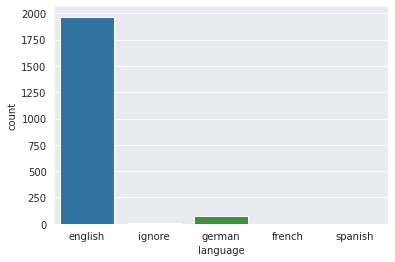

In [65]:
import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(df['language'])

In [66]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Text(0.5, 1.0, 'Top 20 Unigrams')

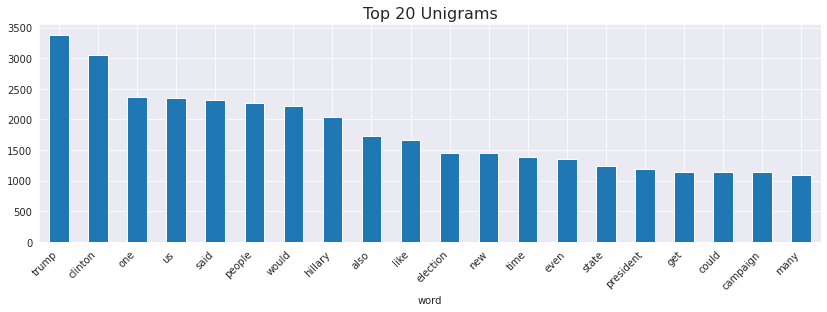

In [67]:
fig = plt.subplots(figsize=(14,4))
common_words = get_top_n_words(df['text_without_stopwords'], 20)
df2 = DataFrame (common_words,columns=['word','count'])
chart = df2.groupby('word').sum()['count'].sort_values(ascending=False).plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment='right')
chart.set_title("Top 20 Unigrams",size=16)

Text(0.5, 1.0, 'Top 20 bigrams')

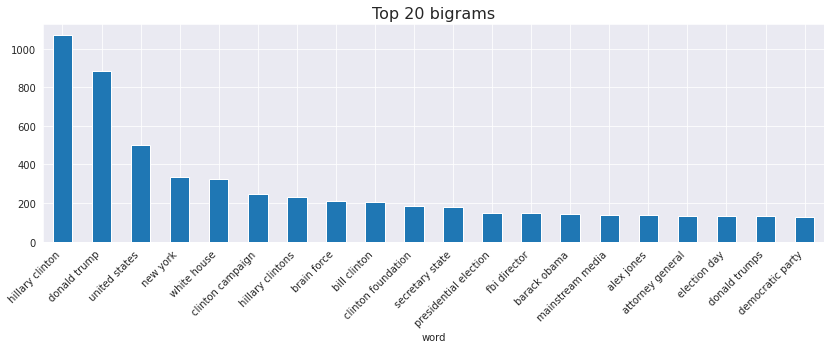

In [68]:
fig = plt.subplots(figsize=(14,4))
common_words = get_top_n_bigram(df['text_without_stopwords'], 20)
df3 = pd.DataFrame(common_words, columns = ['word' ,'count'])
chart = df3.groupby('word').sum()['count'].sort_values(ascending=False).plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment='right')
chart.set_title("Top 20 bigrams",size=16)

Text(0.5, 1.0, 'Top 10 trigrams')

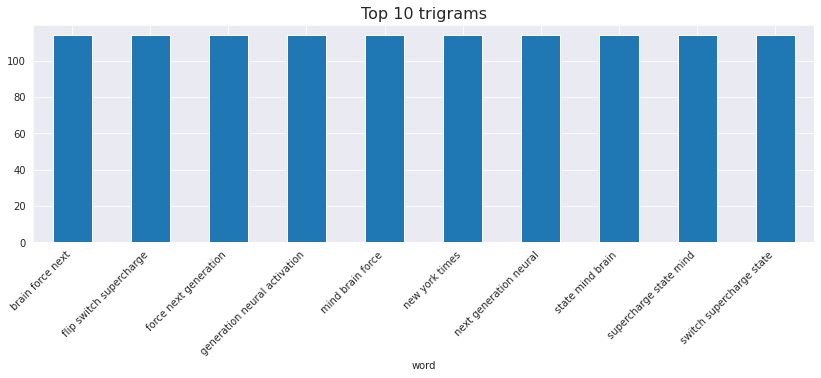

In [69]:
g = plt.subplots(figsize=(14,4))
common_words = get_top_n_trigram(df['text_without_stopwords'], 10)
df4 = pd.DataFrame(common_words, columns = ['word' ,'count'])
chart = df4.groupby('word').sum()['count'].sort_values(ascending=False).plot(kind='bar')
chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment='right')
chart.set_title("Top 10 trigrams",size=16)

In [70]:
features = df[['site_url', 'text_without_stopwords']]
features.head(5)

,site_url,text_without_stopwords
0,100percentfedup.com,print pay back money plus interest entire fami...
1,100percentfedup.com,attorney general loretta lynch plead fifth bar...
2,100percentfedup.com,red state fox news sunday reported morning ant...
3,100percentfedup.com,email kayla mueller prisoner tortured isis cha...
4,100percentfedup.com,email healthcare reform make america great sin...


In [71]:
features['url_text'] = features["site_url"].astype(str) + " " + features["text_without_stopwords"]
features.drop(['site_url', 'text_without_stopwords'], axis = 1, inplace = True)

In [44]:
x = features
y = df['label']

In [72]:
y = y.tolist()

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train['url_text'])
tfidf_test = tfidf_vect.transform(x_test['url_text'])
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [74]:
Random = RandomForestClassifier(n_estimators=150,random_state=0)
Random.fit(tfidf_train,y_train)
y_pred = Random.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred)
print("accuracy:  %0.2f" %(RFscore*100))

accuracy:  87.53


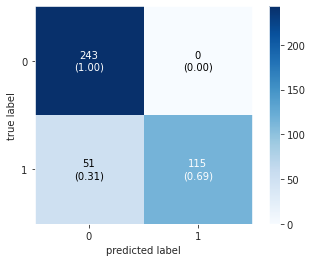

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

cm=confusion_matrix(y_test, y_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

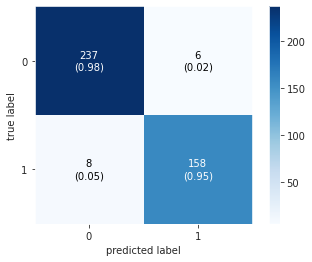

In [79]:
cm=confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

In [80]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=0)
Adab.fit(tfidf_train, y_train)
y_pred = Adab.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred)
print("accuracy: %0.2f" %(ABscore*100))

accuracy: 96.58
